In [2]:
#!pip install textblob

In [3]:
#text=
#"I love python"
#"python is language
#python is use for coding

#text convert into vectors

#I love python is language use for coding
#[11100000]
#[00111000]  ...> vectors ....>polarity_score ...>0.1<positive,-0.1>negative,0 netral
#[00110111]

#Textblob Library

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("linkedin-reviews - linkedin-reviews.csv")
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


Explorartory Data Analysis
we will start by analyzing the distributions of rattings.it will provide insight into the overall sentiment of the reviewa.then we can explore further,such as analyzing the length of reviews.possibly derive insights from the text of thee reviews

plotting the distribution of ratings


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

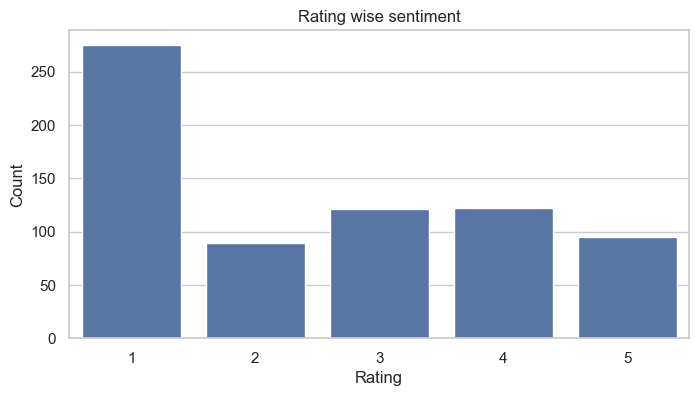

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Rating')
plt.title('Rating wise sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [11]:
df.groupby('Rating').size().reset_index(name='candidates')

,Rating,candidates
0,1,275
1,2,89
2,3,121
3,4,122
4,5,95


Adding Sentiment Labels in the data
we will use textblob provides a polarity scores ranking from-1(very negative) to 1(very posoitive for a given text we can use this score to classify each reviews sentiment as positive ,negative,neutral

In [12]:
from textblob import TextBlob

In [14]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity >0.1:
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else:
        'Neutral'

In [16]:
df['Sentiments']=df['Review'].apply(textblob_sentiment_analysis)
df.sample(5)

,Review,Rating,Sentiments
297,I'd expect atleast having an option to update ...,2,None
679,"Latest update is great, better than other offi...",5,Positive
141,Brilliant!,5,Positive
304,"Nice app, but too slow",3,Positive
471,I love this app.it will help me expand my world!!,5,Positive


Analyzing App Reviews Sentiments

In [18]:
df['Sentiments'].value_counts()

Sentiments
Positive    298
Negative    107
Name: count, dtype: int64

<Axes: ylabel='count'>

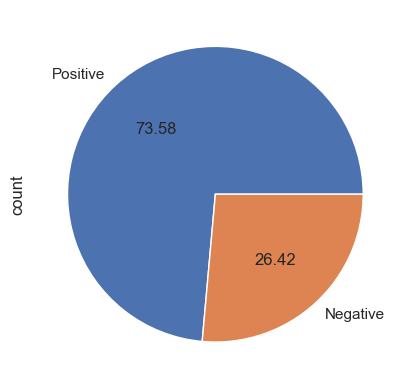

In [19]:
df['Sentiments'].value_counts().plot(kind='pie',autopct='%.2f')

So we can see althrough the app has low ratings,still the reviewrs dont use many negative words in the reviews for the app

next we will explore the relationship between the sentiments and the ratings this analysisi can help us understand whether there is a correlation between 

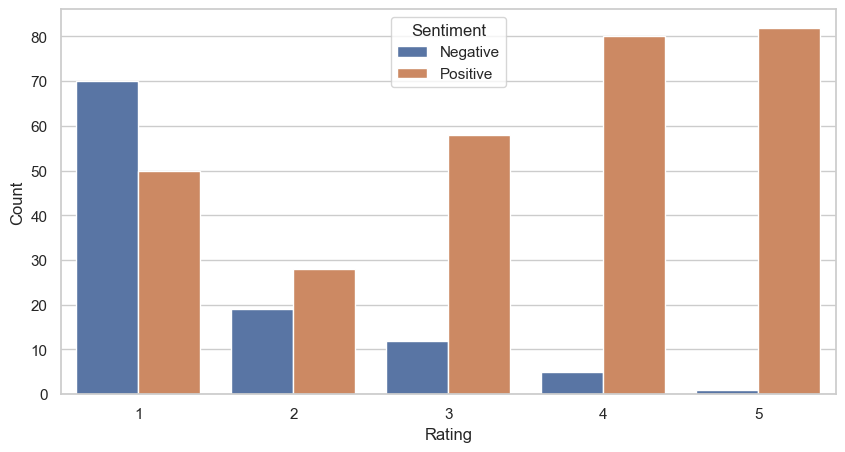

In [22]:
plt.figure (figsize=(10,5))
sns.countplot(data=df,x='Rating',
             hue='Sentiments')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Summary
App reviews Sentiment Analysis is a tool for app developers and bussiness to understand user feedback,prioritize 